# Feature Selection

In [1]:
!pip install imblearn

     |████████████████████████████████| 167 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 22.2 MB 9.9 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, SelectPercentile

from imblearn.over_sampling import RandomOverSampler, SMOTE

## Import Dataset

In [37]:
accidents = pd.read_csv('data/accidents.csv', index_col=0)
accidents.head(2)

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,at_intersection,was_non_functioning_device,is_day,is_evening,is_morning,is_night,is_fall,is_spring,is_summer,is_winter
0,JC343143,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,NaN,...,0,0,1,0,0,0,0,0,1,0
5,JC194776,03/21/2019 10:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,4.0,...,0,0,0,0,0,1,0,1,0,0


In [38]:
for feature in sorted(accidents.columns):
    print(feature)

ALIGNMENT
BEAT_OF_OCCURRENCE
CRASH_DATE
CRASH_DAY_OF_WEEK
CRASH_HOUR
CRASH_TYPE
DEVICE_CONDITION
FIRST_CRASH_TYPE
HIT_AND_RUN_I
INJURIES_UNKNOWN
INTERSECTION_RELATED_I
LANE_CNT
LATITUDE
LIGHTING_CONDITION
LOCATION
LONGITUDE
NOT_RIGHT_OF_WAY_I
POSTED_SPEED_LIMIT
PRIM_CONTRIBUTORY_CAUSE
RD_NO
ROADWAY_SURFACE_COND
ROAD_DEFECT
SEC_CONTRIBUTORY_CAUSE
STREET_DIRECTION
STREET_NAME
STREET_NO
TRAFFICWAY_TYPE
TRAFFIC_CONTROL_DEVICE
WEATHER_CONDITION
WORKERS_PRESENT_I
WORK_ZONE_I
WORK_ZONE_TYPE
at_intersection
at_stop_sign_or_traffic_light
crash_date
crash_month
crash_year
disregarded_traffic_devices
failed_to_yield_right_of_way
has_snow_ice
involved_cyclist
involved_pedestrian
is_clear_weather
is_day
is_evening
is_fall
is_fatal_or_incap
is_morning
is_night
is_rain
is_sleet_snow
is_spring
is_summer
is_weekend
is_winter
reckless_driving
season
time_of_day
using_cellphone
was_dark_no_lighting
was_head_on
was_non_functioning_device
was_parked


In [41]:
accidents.columns[31:]

Index(['LOCATION', 'crash_date', 'crash_year', 'crash_month',
       'is_fatal_or_incap', 'time_of_day', 'is_weekend', 'season',
       'involved_cyclist', 'involved_pedestrian', 'was_head_on', 'was_parked',
       'using_cellphone', 'disregarded_traffic_devices',
       'failed_to_yield_right_of_way', 'reckless_driving', 'is_sleet_snow',
       'is_rain', 'is_clear_weather', 'has_snow_ice', 'was_dark_no_lighting',
       'at_stop_sign_or_traffic_light', 'at_intersection',
       'was_non_functioning_device', 'is_day', 'is_evening', 'is_morning',
       'is_night', 'is_fall', 'is_spring', 'is_summer', 'is_winter'],
      dtype='object')

## Split Data and Determine Features to Assess
Selecting features solely based on training data.

In [44]:
X = accidents[['is_weekend',
               'involved_cyclist',
               'involved_pedestrian',
               'was_head_on',
               'was_parked',
               'using_cellphone',
               'disregarded_traffic_devices',
               'failed_to_yield_right_of_way',
               'reckless_driving',
               'is_sleet_snow',
               'is_rain',
               'is_clear_weather',
               'has_snow_ice',
               'was_dark_no_lighting',
               'at_stop_sign_or_traffic_light',
               'at_intersection',
               'was_non_functioning_device',
               'is_day',
               'is_evening',
               'is_morning',
               'is_night',
               'is_fall', 
               'is_spring',
               'is_summer',
               'is_winter']]

y = accidents['is_fatal_or_incap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [45]:
# OVERSAMPLING

oversampler = RandomOverSampler(sampling_strategy=0.75, random_state=3)
#oversampler = SMOTE(sampling_strategy=0.5, random_state=3)
X_over, y_over = oversampler.fit_resample(X_train.to_numpy(), y_train.to_numpy())

## Mutual Information

In [46]:
mutual_info_scores = mutual_info_classif(X_over, y_over)
mutual_info_scores

array([3.73824521e-03, 1.44029799e-02, 6.50054421e-02, 1.14984993e-03,
       2.80252549e-02, 4.01238567e-04, 3.75863859e-05, 0.00000000e+00,
       3.58323975e-06, 6.63593359e-04, 2.55824101e-03, 3.22174628e-02,
       2.00750245e-05, 2.62127943e-04, 1.69390121e-02, 4.09532004e-03,
       6.90298939e-04, 1.28199171e-02, 8.89039472e-04, 2.57975156e-03,
       5.23564254e-03, 4.28357806e-03, 1.86138603e-03, 2.63754484e-03,
       4.75473418e-03])

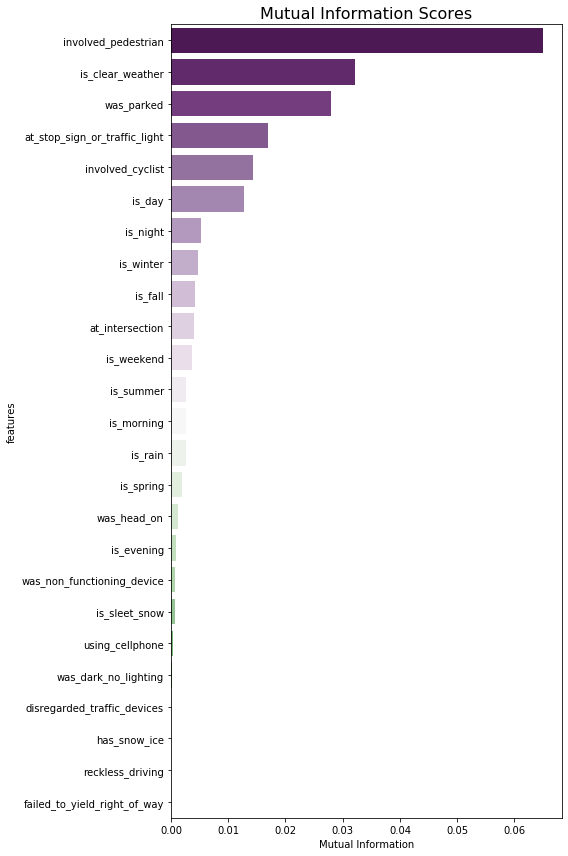

In [47]:
mi_df = pd.DataFrame()
mi_df['features'] = X.columns
mi_df['mutual_info_score'] = mutual_info_scores
mi_df.sort_values('mutual_info_score', ascending=False, axis=0, inplace=True)


fig, ax = plt.subplots(figsize=(8,12))
sns.barplot(data=mi_df,x='mutual_info_score', y='features', palette='PRGn', ax=ax)
ax.set_title('Mutual Information Scores', fontsize=16)
ax.set_xlabel('Mutual Information')
ax.set_yticklabels(mi_df['features'])
fig.tight_layout();

## Chi-Squared

Can only use categorical features.

In [48]:
X = accidents[['is_weekend',
               'involved_cyclist',
               'involved_pedestrian',
               'was_head_on',
               'was_parked',
               'using_cellphone',
               'disregarded_traffic_devices',
               'failed_to_yield_right_of_way',
               'reckless_driving',
               'is_sleet_snow',
               'is_rain',
               'is_clear_weather',
               'has_snow_ice',
               'was_dark_no_lighting',
               'at_stop_sign_or_traffic_light',
               'at_intersection',
               'was_non_functioning_device',
               'is_day',
               'is_evening',
               'is_morning',
               'is_night',
               'is_fall', 
               'is_spring',
               'is_summer',
               'is_winter']]

y = accidents['is_fatal_or_incap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [49]:
# OVERSAMPLING
oversampler = RandomOverSampler(sampling_strategy=0.75, random_state=3)
#oversampler = SMOTE(sampling_strategy=0.5, random_state=3)

X_over, y_over = oversampler.fit_resample(X_train.to_numpy(), y_train.to_numpy())

In [50]:
# First array is comprised of the F-scores.
# Second array is comprised of the p-values.
f_score = chi2(X_over, y_over)
f_score

(array([1.62532104e+02, 1.10116336e+04, 4.27110979e+04, 1.50911001e+03,
        1.61247155e+04,            nan,            nan,            nan,
                   nan, 2.34261067e+02, 8.52954718e+02, 1.18244107e+01,
        8.15548536e+02, 1.29275824e+02, 3.34762966e+03, 2.35396540e+03,
                   nan, 1.13897937e+03, 1.06903947e+02, 3.01344658e+00,
        2.15208259e+03, 5.09562716e+01, 2.05100561e+01, 7.95604080e+01,
        1.34099232e+02]),
 array([3.16548571e-037, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000,             nan,             nan,             nan,
                    nan, 7.01634907e-053, 1.65655486e-187, 5.84592146e-004,
        2.24682835e-179, 5.90195733e-030, 0.00000000e+000, 0.00000000e+000,
                    nan, 1.11448170e-249, 4.67277012e-025, 8.25765379e-002,
        0.00000000e+000, 9.44467600e-013, 5.93187879e-006, 4.67704493e-019,
        5.19718736e-031]))

In [51]:
chi2_p_values = pd.DataFrame()
chi2_p_values['features'] = X_train.columns
chi2_p_values['p_value'] = f_score[1]
chi2_p_values['p_value'] = chi2_p_values['p_value'].apply(lambda x: np.round(x, decimals=4))
chi2_p_values.sort_values('p_value', ascending=True, axis=0, inplace=True)


chi2_p_values

,features,p_value
0,is_weekend,0.0000
22,is_spring,0.0000
21,is_fall,0.0000
20,is_night,0.0000
18,is_evening,0.0000
17,is_day,0.0000
15,at_intersection,0.0000
14,at_stop_sign_or_traffic_light,0.0000
23,is_summer,0.0000
13,was_dark_no_lighting,0.0000
